In [17]:
# We are creating a box plot and checking the data points for IQR
# We are importing the requisite modules 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
df1 = pd.read_excel('canada_company_sales_data.xlsx',sheet_name = 'Store Sales')
df1.to_csv('canada_sales.csv')
df = pd.read_csv('canada_sales.csv')

In [29]:
df.head()

,Unnamed: 0,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
0,0,928,2011-03-01,Low,26,390.2000,Express Air,7.40,British Columbia,Consumer,Furniture,Office Furnishings,Small Box,2011-03-03
1,1,32323,2010-07-23,High,38,259.7175,Regular Air,5.03,Ontario,Small Business,Technology,Telephones and Communication,Medium Box,2010-07-25
2,2,48353,2012-12-15,Not Specified,18,71.2200,Regular Air,0.70,British Columbia,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,2012-12-17
3,3,10144,2011-01-02,Critical,1,192.4900,Delivery Truck,30.00,British Columbia,Corporate,Furniture,Chairs & Chairmats,Jumbo Drum,2011-01-04
4,4,26756,2012-05-10,Medium,25,767.2600,Regular Air,4.00,British Columbia,Home Office,Technology,Computer Peripherals,Small Box,2012-05-10


In [36]:
# print(df['Shipping Cost'].value_counts())
# df['Shipping Cost'].count
print(df['Shipping Cost'].describe())

q1 = df['Shipping Cost'].quantile(0.25)
print('The value of lower quartile is = ', q1)

q2 = df['Shipping Cost'].quantile(0.50)
print('The median or 50th percentile is = ', q2)

q3 = df['Shipping Cost'].quantile(0.75)
print('The value of upper quartile is = ', q3)

iqr = q3 - q1
print('The IQR for shipping cost is = ', iqr)

count    8399.000000
mean       12.838557
std        17.264052
min         0.490000
25%         3.300000
50%         6.070000
75%        13.990000
max       164.730000
Name: Shipping Cost, dtype: float64
The value of lower quartile is =  3.3
The median or 50th percentile is =  6.07
The value of upper quartile is =  13.99
The IQR for shipping cost is =  10.690000000000001


In [21]:
# Now we can calculate the number of outliers using this information
# x = (df['Shipping Cost']<(q1 - 1.5 * iqr)) | (df['Shipping Cost']<(q3 + 1.5 * iqr)).sum()
no_lower_outliers = 0
no_upper_outliers = 0
normal_values = 0
for i in df['Shipping Cost'].values:
    if i < (q1 - 1.5 * iqr):
        no_lower_outliers+=1
    elif i < (q3 + 1.5 * iqr):
        no_upper_outliers+=1
    else:
        normal_values+=1
print('The total number of lower outliers is = ', no_lower_outliers)
print('The total number of upper outliers is = ', no_upper_outliers)
print('Total values falling in range is = ', normal_values)

The total number of lower outliers is =  0
The total number of upper outliers is =  7427
Total values falling in range is =  972


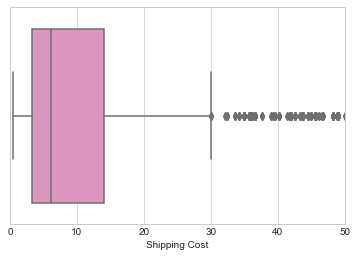

In [39]:
# plt.boxplot(df['Shipping Cost'])
# from pylab import rcParams
sns.set_style('whitegrid')
sns.boxplot(df['Shipping Cost'], palette = 'Set2_r', orient = 'h')
plt.xlim(0,50)
# plt.ylim (0, 50)
plt.show()

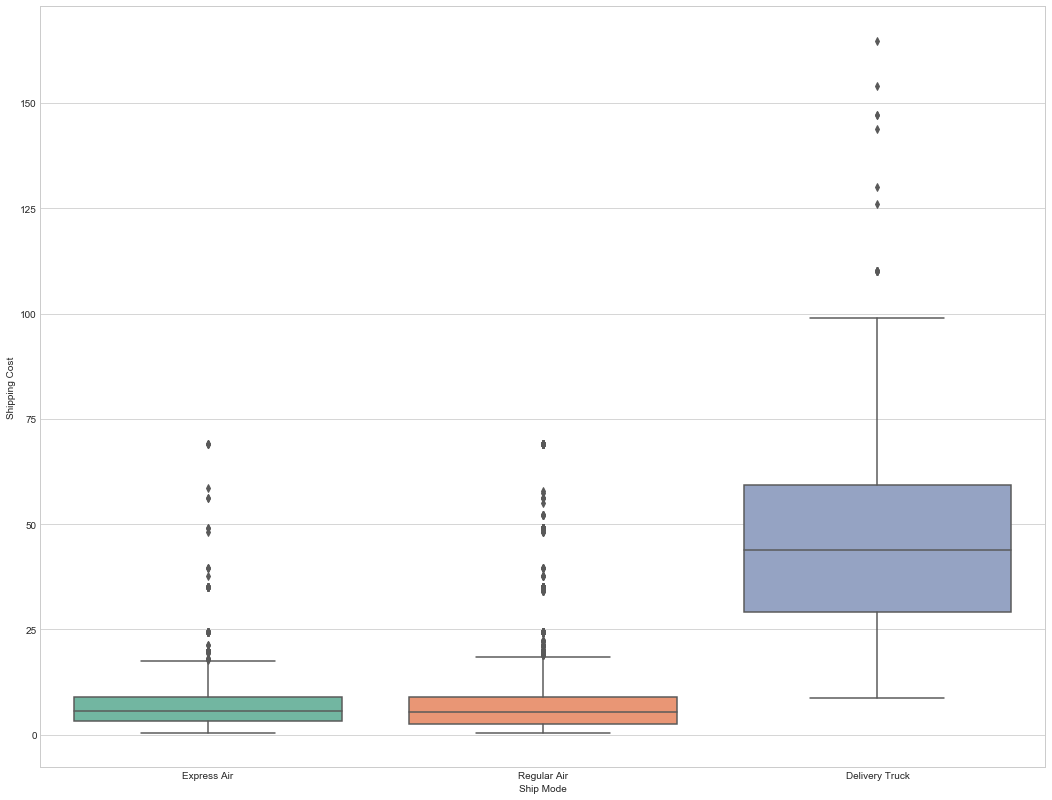

In [23]:
# Creating multiple boxplots 
fig, ax = plt.subplots()
fig.set_size_inches(18, 14)
sns.boxplot(x = 'Ship Mode', y = 'Shipping Cost', data = df, palette = 'Set2', ax = ax)
plt.show()

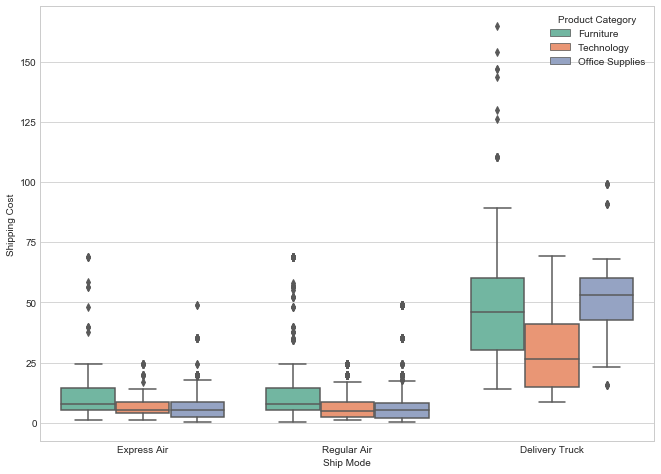

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.boxplot(x = 'Ship Mode', y = 'Shipping Cost', hue = 'Product Category', data = df, palette = 'Set2', ax = ax)
plt.show()

In [25]:
# g = sns.FacetGrid(df, col='Ship Mode', row ='Shipping Cost')
# g = g.map(sns.boxplot,'Product Category' , order = ['Furniture', 'Technology', 'Office Supplies'])
# plt.show()